In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:
from sklearn.model_selection import train_test_split
X = X[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('len of train set:', len(y_train))
print('len of test set:', len(y_test))

len of train set: 105
len of test set: 45


In [25]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)

print('do chinh xac cua mo hinh la:', accuracy_score(y_test, y_pred))

do chinh xac cua mo hinh la: 0.8


In [24]:
def draw(X, y, svm_model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

    # Lấy trục hiện tại
    ax = plt.gca()

    # Lấy kích thước của trục
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Tạo lưới để vẽ đường phân chia
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_model.predict(np.c_[XX.ravel(), YY.ravel()])

    # Vẽ đường phân chia và biên quyết định
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['-', '--', '-'])

    # Thêm nhãn và tiêu đề
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary')

    # Hiển thị biểu đồ
    plt.show()

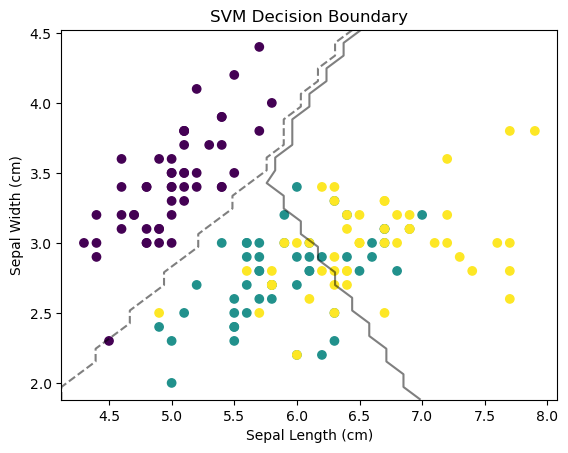

In [27]:
draw(X, y, svm_model)

In [28]:
svm_model = SVC(kernel='rbf', C=10000, gamma=0.1)
svm_model.fit(X_train, y_train)

SVC(C=10000, gamma=0.1)

In [29]:
y_pred = svm_model.predict(X_test)
print('do chinh xac cua mo hinh la:', accuracy_score(y_test, y_pred))

do chinh xac cua mo hinh la: 0.7333333333333333


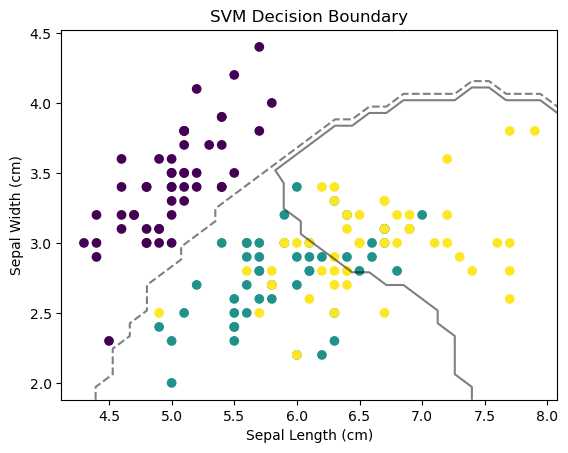

In [30]:
draw(X, y, svm_model)